# Week-20 Assignment Homework

1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.
2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown


In a Jupyter notebook: 
    
3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 



In [24]:
%%HTML
<style>
.container { width:70% }
</style>

In [25]:
import nltk

In [26]:
from nltk.corpus import gutenberg
from nltk.tokenize import regexp_tokenize, TweetTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [27]:
# Show the titles of those books that are part of the gutenberg corpus
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [163]:
# Retrieve the book "Paradise Lost" by John Milton.
print(gutenberg.raw('milton-paradise.txt'))


[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen seed 
In the beginning how the heavens and earth 
Rose out of Chaos: or, if Sion hill 
Delight thee more, and Siloa's brook that flowed 
Fast by the oracle of God, I thence 
Invoke thy aid to my adventurous song, 
That with no middle flight intends to soar 
Above th' Aonian mount, while it pursues 
Things unattempted yet in prose or rhyme. 
And chiefly thou, O Spirit, that dost prefer 
Before all temples th' upright heart and pure, 
Instruct me, for thou know'st; thou from the first 
Wast present, and, with mighty wings outspread, 
Dove-like sat'st brooding on the vast Abyss, 
And mad'st it pregn

In [120]:
print(gutenberg.sents('milton-paradise.txt'))

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [121]:
print(gutenberg.words('milton-paradise.txt'))

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]


In [122]:
paradise_lost = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
len(paradise_lost) #numbers of words

80493

In [166]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
final_tokens = []
for each in words:
    if each not in stop_words:
        final_tokens.append(each)
print("The number of total tokens after removing stopwords are", len((final_tokens)))

The number of total tokens after removing stopwords are 12


In [196]:
#stop words are common words that we want to get rid of them
# nltk.download('stopwords')
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [189]:
text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [190]:
from collections import Counter
word_list = ['bridge', 'bridge', 'apple', 'Bridge', 'bridge', 'Bridge']
word_new_list = [word.lower() for word in word_list]
counts = Counter(word_new_list)
counts
# i=0
# while i<20:


Counter({'bridge': 5, 'apple': 1})

In [197]:
#stop words are all lowercase. we want to do this too
for sentence in text_sentences:
    #but we are still preserving the original cases of the words
    filtered_list = [w for w in sentence if w.lower() not in sw]
    print(filtered_list)

['[', 'Paradise', 'Lost', 'John', 'Milton', '1667', ']']
['Book']
['Man', "'", 'first', 'disobedience', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', ',', 'woe', ',', 'loss', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'regain', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', ',', 'secret', 'top', 'Oreb', ',', 'Sinai', ',', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', ':', ',', 'Sion', 'hill', 'Delight', 'thee', ',', 'Siloa', "'", 'brook', 'flowed', 'Fast', 'oracle', 'God', ',', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', ',', 'middle', 'flight', 'intends', 'soar', 'th', "'", 'Aonian', 'mount', ',', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', '.']
['chiefly', 'thou', ',', 'Spirit', ',', 'dost', 'prefer', 'temples', 'th', "'", 'upright', 'heart', 'pure', ',', 'Instruct', ',', 'thou', 'know', "'", 'st'

['faith', ',', 'love', ',', 'virtue', ',', 'unassayed', 'Alone', ',', 'without', 'exteriour', 'help', 'sustained', '?']
['Let', 'us', 'suspect', 'happy', 'state', 'Left', 'imperfect', 'Maker', 'wise', ',', 'secure', 'single', 'combined', '.']
['Frail', 'happiness', ',', ',', 'Eden', 'Eden', ',', 'thus', 'exposed', '.']
['thus', 'Adam', 'fervently', 'replied', '.']
['Woman', ',', 'best', 'things', 'God', 'ordained', ':', 'creating', 'hand', 'Nothing', 'imperfect', 'deficient', 'left', 'created', ',', 'much', 'less', 'Man', ',', 'aught', 'might', 'happy', 'state', 'secure', ',', 'Secure', 'outward', 'force', ';', 'within', 'danger', 'lies', ',', 'yet', 'lies', 'within', 'power', ':', 'receive', 'harm', '.']
['God', 'left', 'free', ';', 'obeys', 'Reason', ',', 'free', ';', 'Reason', 'made', 'right', ',', 'bid', 'well', 'ware', ',', 'still', 'erect', ';', 'Lest', ',', 'fair', '-', 'appearing', 'good', 'surprised', ',', 'dictate', 'false', ';', 'mis', '-', 'inform', 'God', 'expressly', 'hat

In [198]:
# take one or two characters that should be eliminated, and write a list comprehension to remove them

filter_words=[]
for sentence in text_sentences:
    filtered_list = [w for w in sentence if w.lower() not in sw]
    new_filtered_list = [w for w in filtered_list if w.isalnum()]
    filter_words.append(new_filtered_list)

for w in filter_words:
    
    print(w)

['Paradise', 'Lost', 'John', 'Milton', '1667']
['Book']
['Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme']
['chiefly', 'thou', 'Spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'Instruct', 'thou', 'know', 'st', 'thou', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'st', 'brooding', 'vast', 'Abyss', 'mad', 'st', 'pre

In [199]:
# def remove_stopwords(text_sentences):
#     filtered_text =[word for word in text_sentences if word not in sw]
#     return filtered_text
    

In [203]:
# remove_stopwords(text_sentences)

# for word in text_sentences:
#     print(word)


In [208]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rsagu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [228]:
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

wnl = WordNetLemmatizer()

lemmatizer=[]

for w in filter_words:
    lemmatizer.append([w for w in map(wnl.lemmatize,w)])

freq = (word for sentence in lemmatizer for word in sentence)
freq_count_words = FreqDist(freq)

for word, frequency in freq_count_words.most_common(20):
    print(word, frequency)

Heaven 412
thou 382
thy 339
thee 337
God 258
shall 241
thus 240
u 179
yet 165
though 161
first 156
day 153
Man 135
high 128
Hell 117
may 116
Earth 115
one 114
great 113
thing 110


Heaven 412
thou 382
thy 339
thee 337
God 258
shall 241
thus 240
u 179
yet 165
though 161
first 156
day 153
Man 135
high 128
Hell 117
may 116
Earth 115
one 114
great 113
thing 110


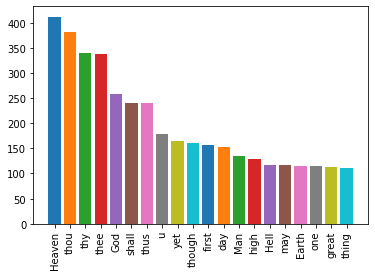

In [223]:
wnl = WordNetLemmatizer()
lemmatizer=[]
for w in filter_words:
    lemmatizer.append([wn for wn in map(wnl.lemmatize,w)])
# print(lemmatizer)
freq = (word for sentence in lemmatizer for word in sentence)
freq_count_words = Counter(freq)
for word, frequency in freq_count_words.most_common(20):
    print(word, frequency)
    
#     plt.hist(word, frequency)
    plt.bar(word, frequency)
    plt.xticks(rotation=90)

4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rsagu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [257]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import subjectivity

In [258]:
analyzer = SentimentIntensityAnalyzer()

text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [259]:
def put_together(input_sent):
    '''This function puts the sentence back together'''
    str1=" "
    
    # the join command puts the strings together but it needs to be in a list so it was appended to the output
    output = str1.join(input_sent)
    return output

In [260]:
out=[]

for i in range(0,len(text_sentences)):
    out.append(put_together(text_sentences[i]))
print(out)

['[ Paradise Lost by John Milton 1667 ]', 'Book I', "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .", "And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Abyss 

In [261]:
import pandas as pd
sa_df = pd.DataFrame(columns = ['Sentence', 'Compound', 'Negative', 'Neutral', 'Positive'])
sa_df

,Sentence,Compound,Negative,Neutral,Positive


In [262]:
for sentence in out:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    sa_df['Sentence']=sentence
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]),end='')
        
    print()

[ Paradise Lost by John Milton 1667 ]
compound: 0.4404, neg: 0.219, neu: 0.381, pos: 0.4, 
Book I
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .
compound: 0.8885, neg: 0.117, neu: 0.691, pos: 0.192, 
And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me

But wherefore let we then our faithful friends , Th ' associates and co - partners of our loss , Lie thus astonished on th ' oblivious pool , And call them not to share with us their part In this unhappy mansion , or once more With rallied arms to try what may be yet Regained in Heaven , or what more lost in Hell ?"
compound: -0.6114, neg: 0.232, neu: 0.583, pos: 0.185, 
So Satan spake ; and him Beelzebub Thus answered :--" Leader of those armies bright Which , but th ' Omnipotent , none could have foiled !
compound: 0.3054, neg: 0.0, neu: 0.904, pos: 0.096, 
If once they hear that voice , their liveliest pledge Of hope in fears and dangers -- heard so oft In worst extremes , and on the perilous edge Of battle , when it raged , in all assaults Their surest signal -- they will soon resume New courage and revive , though now they lie Grovelling and prostrate on yon lake of fire , As we erewhile , astounded and amazed ; No wonder , fallen such a pernicious height !"
compound: -0.7879, neg

compound: -0.6705, neg: 0.203, neu: 0.731, pos: 0.067, 
With these in troop Came Astoreth , whom the Phoenicians called Astarte , queen of heaven , with crescent horns ; To whose bright image nigntly by the moon Sidonian virgins paid their vows and songs ; In Sion also not unsung , where stood Her temple on th ' offensive mountain , built By that uxorious king whose heart , though large , Beguiled by fair idolatresses , fell To idols foul .
compound: 0.6705, neg: 0.043, neu: 0.835, pos: 0.122, 
Thammuz came next behind , Whose annual wound in Lebanon allured The Syrian damsels to lament his fate In amorous ditties all a summer ' s day , While smooth Adonis from his native rock Ran purple to the sea , supposed with blood Of Thammuz yearly wounded : the love - tale Infected Sion ' s daughters with like heat , Whose wanton passions in the sacred proch Ezekiel saw , when , by the vision led , His eye surveyed the dark idolatries Of alienated Judah .
compound: 0.8176, neg: 0.071, neu: 0.762

compound: 0.9287, neg: 0.184, neu: 0.544, pos: 0.272, 
He now prepared To speak ; whereat their doubled ranks they bend From wing to wing , and half enclose him round With all his peers : attention held them mute .
compound: 0.2263, neg: 0.0, neu: 0.934, pos: 0.066, 
Thrice he assayed , and thrice , in spite of scorn , Tears , such as Angels weep , burst forth : at last Words interwove with sighs found out their way :-- " O myriads of immortal Spirits !
compound: -0.8748, neg: 0.3, neu: 0.65, pos: 0.05, 
O Powers Matchless , but with th ' Almighth !-- and that strife Was not inglorious , though th ' event was dire , As this place testifies , and this dire change , Hateful to utter .
compound: -0.9273, neg: 0.326, neu: 0.674, pos: 0.0, 
But what power of mind , Forseeing or presaging , from the depth Of knowledge past or present , could have feared How such united force of gods , how such As stood like these , could ever know repulse ?
compound: -0.5499, neg: 0.2, neu: 0.653, pos: 0.146

compound: -0.9153, neg: 0.556, neu: 0.444, pos: 0.0, 
On th ' other side up rose Belial , in act more graceful and humane .
compound: 0.5095, neg: 0.0, neu: 0.785, pos: 0.215, 
A fairer person lost not Heaven ; he seemed For dignity composed , and high exploit .
compound: -0.4023, neg: 0.354, neu: 0.497, pos: 0.149, 
But all was false and hollow ; though his tongue Dropped manna , and could make the worse appear The better reason , to perplex and dash Maturest counsels : for his thoughts were low -- To vice industrious , but to nobler deeds Timorous and slothful .
compound: -0.631, neg: 0.177, neu: 0.747, pos: 0.076, 
Yet he pleased the ear , And with persuasive accent thus began :-- " I should be much for open war , O Peers , As not behind in hate , if what was urged Main reason to persuade immediate war Did not dissuade me most , and seem to cast Ominous conjecture on the whole success ; When he who most excels in fact of arms , In what he counsels and in what excels Mistrustful , gr

compound: 0.7158, neg: 0.0, neu: 0.668, pos: 0.332, 
while we dream , And know not that the King of Heaven hath doomed This place our dungeon , not our safe retreat Beyond his potent arm , to live exempt From Heaven ' s high jurisdiction , in new league Banded against his throne , but to remain In strictest bondage , though thus far removed , Under th ' inevitable curb , reserved His captive multitude .
compound: 0.103, neg: 0.089, neu: 0.799, pos: 0.112, 
For he , to be sure , In height or depth , still first and last will reign Sole king , and of his kingdom lose no part By our revolt , but over Hell extend His empire , and with iron sceptre rule Us here , as with his golden those in Heaven .
compound: -0.4019, neg: 0.167, neu: 0.695, pos: 0.138, 
What sit we then projecting peace and war ?
compound: -0.1027, neg: 0.291, neu: 0.448, pos: 0.261, 
War hath determined us and foiled with loss Irreparable ; terms of peace yet none Vouchsafed or sought ; for what peace will be given To us 

Far off from these , a slow and silent stream , Lethe , the river of oblivion , rolls Her watery labyrinth , whereof who drinks Forthwith his former state and being forgets -- Forgets both joy and grief , pleasure and pain .
compound: 0.25, neg: 0.141, neu: 0.696, pos: 0.163, 
Beyond this flood a frozen continent Lies dark and wild , beat with perpetual storms Of whirlwind and dire hail , which on firm land Thaws not , but gathers heap , and ruin seems Of ancient pile ; all else deep snow and ice , A gulf profound as that Serbonian bog Betwixt Damiata and Mount Casius old , Where armies whole have sunk : the parching air Burns frore , and cold performs th ' effect of fire .
compound: -0.9011, neg: 0.16, neu: 0.825, pos: 0.015, 
Thither , by harpy - footed Furies haled , At certain revolutions all the damned Are brought ; and feel by turns the bitter change Of fierce extremes , extremes by change more fierce , From beds of raging fire to starve in ice Their soft ethereal warmth , and th

compound: -0.5719, neg: 0.222, neu: 0.778, pos: 0.0, 
And know ' st for whom ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For him who sits above , and laughs the while At thee , ordained his drudge to execute Whate ' er his wrath , which he calls justice , bids -- His wrath , which one day will destroy ye both !"
compound: 0.5255, neg: 0.081, neu: 0.761, pos: 0.159, 
She spake , and at her words the hellish Pest Forbore : then these to her Satan returned :-- " So strange thy outcry , and thy words so strange Thou interposest , that my sudden hand , Prevented , spares to tell thee yet by deeds What it intends , till first I know of thee What thing thou art , thus double - formed , and why , In this infernal vale first met , thou call ' st Me father , and that phantasm call ' st my son .
compound: -0.8248, neg: 0.14, neu: 0.809, pos: 0.05, 
I know thee not , nor ever saw till now Sight more detestable than him and thee ."
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
T ' whom thus the

compound: -0.8484, neg: 0.176, neu: 0.719, pos: 0.105, 
Thither , full fraught with mischievous revenge , Accursed , and in a cursed hour , he hies .
compound: -0.5267, neg: 0.221, neu: 0.779, pos: 0.0, 
Book III
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hail , holy Light , offspring of Heaven firstborn , Or of the Eternal coeternal beam May I express thee unblam ' d ?
compound: 0.5574, neg: 0.0, neu: 0.765, pos: 0.235, 
since God is light , And never but in unapproached light Dwelt from eternity , dwelt then in thee Bright effluence of bright essence increate .
compound: 0.85, neg: 0.0, neu: 0.684, pos: 0.316, 
Or hear " st thou rather pure ethereal stream , Whose fountain who shall tell ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
before the sun , Before the Heavens thou wert , and at the voice Of God , as with a mantle , didst invest *** The rising world of waters dark and deep , Won from the void and formless infinite .
compound: 0.8176, neg: 0.0, neu: 0.79, pos: 0.21, 
Thee

compound: 0.6808, neg: 0.0, neu: 0.741, pos: 0.259, 
So should thy goodness and thy greatness both Be question ' d and blasphem ' d without defence .
compound: 0.453, neg: 0.078, neu: 0.725, pos: 0.197, 
To whom the great Creator thus replied .
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
O son , in whom my soul hath chief delight , Son of my bosom , Son who art alone .
compound: 0.4404, neg: 0.101, neu: 0.704, pos: 0.196, 
My word , my wisdom , and effectual might , All hast thou spoken as my thoughts are , all As my eternal purpose hath decreed ; Man shall not quite be lost , but sav ' d who will ; Yet not of will in him , but grace in me Freely vouchsaf ' d ; once more I will renew His lapsed powers , though forfeit ; and enthrall ' d By sin to foul exorbitant desires ; Upheld by me , yet once more he shall stand On even ground against his mortal foe ; By me upheld , that he may know how frail His fallen condition is , and to me owe All his deliverance , and to none but me .

No sooner had the Almighty ceased , but all The multitude of Angels , with a shout Loud as from numbers without number , sweet As from blest voices , uttering joy , Heaven rung With jubilee , and loud Hosannas filled The eternal regions : Lowly reverent Towards either throne they bow , and to the ground With solemn adoration down they cast Their crowns inwove with amarant and gold ; Immortal amarant , a flower which once In Paradise , fast by the tree of life , Began to bloom ; but soon for man ' s offence To Heaven removed , where first it grew , there grows , And flowers aloft shading the fount of life , And where the river of bliss through midst of Heaven Rolls o ' er Elysian flowers her amber stream ; With these that never fade the Spirits elect Bind their resplendent locks inwreathed with beams ; Now in loose garlands thick thrown off , the bright Pavement , that like a sea of jasper shone , Impurpled with celestial roses smiled .
compound: 0.9913, neg: 0.079, neu: 0.675, pos: 0.2

As when a scout , Through dark ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
; nd desart ways with ? oeril gone All ? might ,?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
; t ? kast by break of cheerful dawn Obtains the brow of some high - climbing hill , Which to his eye discovers unaware The goodly prospect of some foreign land First seen , or some renowned metropolis With glistering spires and pinnacles adorned , Which now the rising sun gilds with his beams : Such wonder seised , though after Heaven seen , The Spirit malign , but much more envy seised , At sight of all this world beheld so fair .
compound: 0.7389, neg: 0.055, neu: 0.788, pos: 0.157, 
Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first

compound: 0.34, neg: 0.132, neu: 0.689, pos: 0.179, 
Thus while he spake , each passion dimmed his face Thrice changed with pale , ire , envy , and despair ; Which marred his borrowed visage , and betrayed Him counterfeit , if any eye beheld .
compound: -0.6597, neg: 0.225, neu: 0.695, pos: 0.08, 
For heavenly minds from such distempers foul Are ever clear .
compound: 0.765, neg: 0.0, neu: 0.548, pos: 0.452, 
Whereof he soon aware , Each perturbation smoothed with outward calm , Artificer of fraud ; and was the first That practised falsehood under saintly show , Deep malice to conceal , couched with revenge : Yet not enough had practised to deceive Uriel once warned ; whose eye pursued him down The way he went , and on the Assyrian mount Saw him disfigured , more than could befall Spirit of happy sort ; his gestures fierce He marked and mad demeanour , then alone , As he supposed , all unobserved , unseen .
compound: -0.8591, neg: 0.178, neu: 0.743, pos: 0.079, 
So on he fares , and to

Then let us not think hard One easy prohibition , who enjoy Free leave so large to all things else , and choice Unlimited of manifold delights : But let us ever praise him , and extol His bounty , following our delightful task , To prune these growing plants , and tend these flowers , Which were it toilsome , yet with thee were sweet .
compound: 0.9732, neg: 0.015, neu: 0.639, pos: 0.346, 
To whom thus Eve replied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
O thou for whom And from whom I was formed , flesh of thy flesh , And without whom am to no end , my guide And head !
compound: -0.3595, neg: 0.102, neu: 0.898, pos: 0.0, 
what thou hast said is just and right .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For we to him indeed all praises owe , And daily thanks ; I chiefly , who enjoy So far the happier lot , enjoying thee Pre - eminent by so much odds , while thou Like consort to thyself canst no where find .
compound: 0.9506, neg: 0.043, neu: 0.585, pos: 0.372, 
That day I of

These then , though unbeheld in deep of night , Shine not in vain ; nor think , though men were none , That Heaven would want spectators , God want praise : Millions of spiritual creatures walk the earth Unseen , both when we wake , and when we sleep : All these with ceaseless praise his works behold Both day and night : How often from the steep Of echoing hill or thicket have we heard Celestial voices to the midnight air , Sole , or responsive each to others note , Singing their great Creator ?
compound: 0.9445, neg: 0.027, neu: 0.761, pos: 0.211, 
oft in bands While they keep watch , or nightly rounding walk , With heavenly touch of instrumental sounds In full harmonick number joined , their songs Divide the night , and lift our thoughts to Heaven .
compound: 0.8225, neg: 0.0, neu: 0.777, pos: 0.223, 
Thus talking , hand in hand alone they passed On to their blissful bower : it was a place Chosen by the sovran Planter , when he framed All things to Man ' s delightful use ; the roof O

compound: -0.4019, neg: 0.184, neu: 0.816, pos: 0.0, 
ye knew me once no mate For you , there sitting where ye durst not soar : Not to know me argues yourselves unknown , The lowest of your throng ; or , if ye know , Why ask ye , and superfluous begin Your message , like to end as much in vain ?
compound: -0.7717, neg: 0.19, neu: 0.764, pos: 0.047, 
To whom thus Zephon , answering scorn with scorn .
compound: -0.6597, neg: 0.474, neu: 0.526, pos: 0.0, 
Think not , revolted Spirit , thy shape the same , Or undiminished brightness to be known , As when thou stoodest in Heaven upright and pure ; That glory then , when thou no more wast good , Departed from thee ; and thou resemblest now Thy sin and place of doom obscure and foul .
compound: 0.5515, neg: 0.16, neu: 0.639, pos: 0.201, 
But come , for thou , be sure , shalt give account To him who sent us , whose charge is to keep This place inviolable , and these from harm .
compound: -0.4215, neg: 0.15, neu: 0.757, pos: 0.093, 
So spake th

If from this hour Within these hallowed limits thou appear , Back to the infernal pit I drag thee chained , And seal thee so , as henceforth not to scorn The facile gates of Hell too slightly barred .
compound: -0.6419, neg: 0.159, neu: 0.785, pos: 0.055, 
So threatened he ; but Satan to no threats Gave heed , but waxing more in rage replied .
compound: -0.9321, neg: 0.538, neu: 0.462, pos: 0.0, 
Then when I am thy captive talk of chains , Proud limitary Cherub !
compound: 0.5255, neg: 0.0, neu: 0.747, pos: 0.253, 
but ere then Far heavier load thyself expect to feel From my prevailing arm , though Heaven ' s King Ride on thy wings , and thou with thy compeers , Us ' d to the yoke , drawest his triumphant wheels In progress through the road of Heaven star - paved .
compound: 0.9595, neg: 0.0, neu: 0.694, pos: 0.306, 
While thus he spake , the angelick squadron bright Turned fiery red , sharpening in mooned horns Their phalanx , and began to hem him round With ported spears , as thick a

compound: 0.8122, neg: 0.0, neu: 0.486, pos: 0.514, 
Thine this universal frame , Thus wonderous fair ; Thyself how wonderous then !
compound: 0.3802, neg: 0.0, neu: 0.794, pos: 0.206, 
Unspeakable , who sitst above these heavens To us invisible , or dimly seen In these thy lowest works ; yet these declare Thy goodness beyond thought , and power divine .
compound: 0.7717, neg: 0.074, neu: 0.659, pos: 0.266, 
Speak , ye who best can tell , ye sons of light , Angels ; for ye behold him , and with songs And choral symphonies , day without night , Circle his throne rejoicing ; ye in Heaven On Earth join all ye Creatures to extol Him first , him last , him midst , and without end .
compound: 0.926, neg: 0.0, neu: 0.765, pos: 0.235, 
Fairest of stars , last in the train of night , If better thou belong not to the dawn , Sure pledge of day , that crownest the smiling morn With thy bright circlet , praise him in thy sphere , While day arises , that sweet hour of prime .
compound: 0.9493, neg: 

compound: 0.9184, neg: 0.0, neu: 0.814, pos: 0.186, 
Haste hither , Eve , and worth thy sight behold Eastward among those trees , what glorious shape Comes this way moving ; seems another morn Risen on mid - noon ; some great behest from Heaven To us perhaps he brings , and will vouchsafe This day to be our guest .
compound: 0.926, neg: 0.0, neu: 0.752, pos: 0.248, 
But go with speed , And , what thy stores contain , bring forth , and pour Abundance , fit to honour and receive Our heavenly stranger : Well we may afford Our givers their own gifts , and large bestow From large bestowed , where Nature multiplies Her fertile growth , and by disburthening grows More fruitful , which instructs us not to spare .
compound: 0.9761, neg: 0.0, neu: 0.677, pos: 0.323, 
To whom thus Eve .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Adam , earth ' s hallowed mould , Of God inspired !
compound: 0.68, neg: 0.0, neu: 0.472, pos: 0.528, 
small store will serve , where store , All seasons , ripe for us

compound: 0.8616, neg: 0.105, neu: 0.444, pos: 0.451, 
To whom the patriarch of mankind replied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
O favourable Spirit , propitious guest , Well hast thou taught the way that might direct Our knowledge , and the scale of nature set From center to circumference ; whereon , In contemplation of created things , By steps we may ascend to God .
compound: 0.7096, neg: 0.0, neu: 0.811, pos: 0.189, 
But say , What meant that caution joined , If ye be found Obedient ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Can we want obedience then To him , or possibly his love desert , Who formed us from the dust and placed us here Full to the utmost measure of what bliss Human desires can seek or apprehend ?
compound: 0.8481, neg: 0.0, neu: 0.782, pos: 0.218, 
To whom the Angel .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Son of Heaven and Earth , Attend !
compound: 0.5562, neg: 0.0, neu: 0.582, pos: 0.418, 
That thou art happy , owe to God ; That thou c

Regions they passed , the mighty regencies Of Seraphim , and Potentates , and Thrones , In their triple degrees ; regions to which All thy dominion , Adam , is no more Than what this garden is to all the earth , And all the sea , from one entire globose Stretched into longitude ; which having passed , At length into the limits of the north They came ; and Satan to his royal seat High on a hill , far blazing , as a mount Raised on a mount , with pyramids and towers From diamond quarries hewn , and rocks of gold ; The palace of great Lucifer , ( so call That structure in the dialect of men Interpreted ,) which not long after , he Affecting all equality with God , In imitation of that mount whereon Messiah was declared in sight of Heaven , The Mountain of the Congregation called ; For thither he assembled all his train , Pretending so commanded to consult About the great reception of their King , Thither to come , and with calumnious art Of counterfeited truth thus held their ears .
compo

that such resemblance of the Highest Should yet remain , where faith and realty Remain not : Wherefore should not strength and might There fail where virtue fails , or weakest prove Where boldest , though to fight unconquerable ?
compound: -0.7669, neg: 0.296, neu: 0.54, pos: 0.164, 
His puissance , trusting in the Almighty ' s aid , I mean to try , whose reason I have tried Unsound and false ; nor is it aught but just , That he , who in debate of truth hath won , Should win in arms , in both disputes alike Victor ; though brutish that contest and foul , When reason hath to deal with force , yet so Most reason is that reason overcome .
compound: 0.9246, neg: 0.035, neu: 0.763, pos: 0.201, 
So pondering , and from his armed peers Forth stepping opposite , half - way he met His daring foe , at this prevention more Incensed , and thus securely him defied .
compound: -0.3167, neg: 0.182, neu: 0.675, pos: 0.144, 
Proud , art thou met ?
compound: 0.4767, neg: 0.0, neu: 0.492, pos: 0.508, 
th

compound: 0.8093, neg: 0.0, neu: 0.656, pos: 0.344, 
Heaven , the seat of bliss , Brooks not the works of violence and war .
compound: -0.25, neg: 0.333, neu: 0.375, pos: 0.292, 
Hence then , and evil go with thee along , Thy offspring , to the place of evil , Hell ; Thou and thy wicked crew !
compound: -0.9589, neg: 0.501, neu: 0.499, pos: 0.0, 
there mingle broils , Ere this avenging sword begin thy doom , Or some more sudden vengeance , winged from God , Precipitate thee with augmented pain .
compound: -0.5994, neg: 0.214, neu: 0.712, pos: 0.075, 
So spake the Prince of Angels ; to whom thus The Adversary .
compound: -0.2023, neg: 0.153, neu: 0.847, pos: 0.0, 
Nor think thou with wind Of aery threats to awe whom yet with deeds Thou canst not .
compound: -0.4215, neg: 0.149, neu: 0.851, pos: 0.0, 
Hast thou turned the least of these To flight , or if to fall , but that they rise Unvanquished , easier to transact with me That thou shouldst hope , imperious , and with threats To chase 

Forthwith from council to the work they flew ; None arguing stood ; innumerable hands Were ready ; in a moment up they turned Wide the celestial soil , and saw beneath The originals of nature in their crude Conception ; sulphurous and nitrous foam They found , they mingled , and , with subtle art , Concocted and adusted they reduced To blackest grain , and into store conveyed : Part hidden veins digged up ( nor hath this earth Entrails unlike ) of mineral and stone , Whereof to found their engines and their balls Of missive ruin ; part incentive reed Provide , pernicious with one touch to fire .
compound: -0.5299, neg: 0.093, neu: 0.837, pos: 0.07, 
So all ere day - spring , under conscious night , Secret they finished , and in order set , With silent circumspection , unespied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now when fair morn orient in Heaven appeared , Up rose the victor - Angels , and to arms The matin trumpet sung : In arms they stood Of golden panoply , refulgent h

compound: 0.7684, neg: 0.0, neu: 0.662, pos: 0.338, 
They , hardened more by what might most reclaim , Grieving to see his glory , at the sight Took envy ; and , aspiring to his highth , Stood re - embattled fierce , by force or fraud Weening to prosper , and at length prevail Against God and Messiah , or to fall In universal ruin last ; and now To final battle drew , disdaining flight , Or faint retreat ; when the great Son of God To all his host on either hand thus spake .
compound: -0.0202, neg: 0.164, neu: 0.662, pos: 0.174, 
Stand still in bright array , ye Saints ; here stand , Ye Angels armed ; this day from battle rest : Faithful hath been your warfare , and of God Accepted , fearless in his righteous cause ; And as ye have received , so have ye done , Invincibly : But of this cursed crew The punishment to other hand belongs ; Vengeance is his , or whose he sole appoints : Number to this day ' s work is not ordained , Nor multitude ; stand only , and behold God ' s indignation 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
This also thy request , with caution asked , Obtain ; though to recount almighty works What words or tongue of Seraph can suffice , Or heart of man suffice to comprehend ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Yet what thou canst attain , which best may serve To glorify the Maker , and infer Thee also happier , shall not be withheld Thy hearing ; such commission from above I have received , to answer thy desire Of knowledge within bounds ; beyond , abstain To ask ; nor let thine own inventions hope Things not revealed , which the invisible King , Only Omniscient , hath suppressed in night ; To none communicable in Earth or Heaven : Enough is left besides to search and know .
compound: 0.9648, neg: 0.0, neu: 0.776, pos: 0.224, 
But knowledge is as food , and needs no less Her temperance over appetite , to know In measure what the mind may well contain ; Oppresses else with surfeit , and soon turns Wisdom to folly , as nourishment to 

compound: 0.9873, neg: 0.0, neu: 0.816, pos: 0.184, 
And God said , Let the waters generate Reptile with spawn abundant , living soul : And let fowl fly above the Earth , with wings Displayed on the open firmament of Heaven .
compound: 0.6597, neg: 0.0, neu: 0.833, pos: 0.167, 
And God created the great whales , and each Soul living , each that crept , which plenteously The waters generated by their kinds ; And every bird of wing after his kind ; And saw that it was good , and blessed them , saying .
compound: 0.9545, neg: 0.0, neu: 0.642, pos: 0.358, 
Be fruitful , multiply , and in the seas , And lakes , and running streams , the waters fill ; And let the fowl be multiplied , on the Earth .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Forthwith the sounds and seas , each creek and bay , With fry innumerable swarm , and shoals Of fish that with their fins , and shining scales , Glide under the green wave , in sculls that oft Bank the mid sea : part single , or with mate , Graze the s

compound: 0.7574, neg: 0.0, neu: 0.629, pos: 0.371, 
infinite Thy power !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
what thought can measure thee , or tongue Relate thee !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Greater now in thy return Than from the giant Angels : Thee that day Thy thunders magnified ; but to create Is greater than created to destroy .
compound: 0.5267, neg: 0.136, neu: 0.573, pos: 0.291, 
Who can impair thee , Mighty King , or bound Thy empire !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Easily the proud attempt Of Spirits apostate , and their counsels vain , Thou hast repelled ; while impiously they thought Thee to diminish , and from thee withdraw The number of thy worshippers .
compound: 0.5859, neg: 0.077, neu: 0.687, pos: 0.236, 
Who seeks To lessen thee , against his purpose serves To manifest the more thy might : his evil Thou usest , and from thence createst more good .
compound: -0.2975, neg: 0.144, neu: 0.752, pos: 0.104, 
Witness this new - m

compound: 0.3274, neg: 0.08, neu: 0.825, pos: 0.095, 
Of other creatures , as him pleases best , Wherever placed , let him dispose ; joy thou In what he gives to thee , this Paradise And thy fair Eve ; Heaven is for thee too high To know what passes there ; be lowly wise : Think only what concerns thee , and thy being ; Dream not of other worlds , what creatures there Live , in what state , condition , or degree ; Contented that thus far hath been revealed Not of Earth only , but of highest Heaven .
compound: 0.9575, neg: 0.016, neu: 0.729, pos: 0.254, 
To whom thus Adam , cleared of doubt , replied .
compound: -0.2732, neg: 0.253, neu: 0.606, pos: 0.141, 
How fully hast thou satisfied me , pure Intelligence of Heaven , Angel serene !
compound: 0.9145, neg: 0.0, neu: 0.385, pos: 0.615, 
And , freed from intricacies , taught to live The easiest way ; nor with perplexing thoughts To interrupt the sweet of life , from which God hath bid dwell far off all anxious cares , And not molest us 

' Not only these fair bounds , but all the Earth ' To thee and to thy race I give ; as lords ' Possess it , and all things that therein live , ' Or live in sea , or air ; beast , fish , and fowl .
compound: -0.1232, neg: 0.041, neu: 0.959, pos: 0.0, 
' In sign whereof , each bird and beast behold ' After their kinds ; I bring them to receive ' From thee their names , and pay thee fealty ' With low subjection ; understand the same ' Of fish within their watery residence , ' Not hither summoned , since they cannot change ' Their element , to draw the thinner air .'
compound: -0.3612, neg: 0.068, neu: 0.932, pos: 0.0, 
As thus he spake , each bird and beast behold Approaching two and two ; these cowering low With blandishment ; each bird stooped on his wing .
compound: -0.2732, neg: 0.084, neu: 0.916, pos: 0.0, 
I named them , as they passed , and understood Their nature , with such knowledge God endued My sudden apprehension : But in these I found not what methought I wanted still ; And 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
or do they mix Irradiance , virtual or immediate touch ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To whom the Angel , with a smile that glowed Celestial rosy red , Love ' s proper hue , Answered .
compound: 0.7717, neg: 0.0, neu: 0.66, pos: 0.34, 
Let it suffice thee that thou knowest Us happy , and without love no happiness .
compound: -0.1788, neg: 0.288, neu: 0.457, pos: 0.255, 
Whatever pure thou in the body enjoyest , ( And pure thou wert created ) we enjoy In eminence ; and obstacle find none Of membrane , joint , or limb , exclusive bars ; Easier than air with air , if Spirits embrace , Total they mix , union of pure with pure Desiring , nor restrained conveyance need , As flesh to mix with flesh , or soul with soul .
compound: 0.8074, neg: 0.038, neu: 0.784, pos: 0.178, 
But I can now no more ; the parting sun Beyond the Earth ' s green Cape and verdant Isles Hesperian sets , my signal to depart .
compound: -0.4215, neg: 0.118,

Who aspires , must down as low As high he soared ; obnoxious , first or last , To basest things .
compound: -0.6249, neg: 0.254, neu: 0.746, pos: 0.0, 
Revenge , at first though sweet , Bitter ere long , back on itself recoils : Let it ; I reck not , so it light well aimed , Since higher I fall short , on him who next Provokes my envy , this new favourite Of Heaven , this man of clay , son of despite , Whom , us the more to spite , his Maker raised From dust : Spite then with spite is best repaid .
compound: -0.8173, neg: 0.251, neu: 0.598, pos: 0.151, 
So saying , through each thicket dank or dry , Like a black mist low - creeping , he held on His midnight - search , where soonest he might find The serpent ; him fast - sleeping soon he found In labyrinth of many a round self - rolled , His head the midst , well stored with subtile wiles : Not yet in horrid shade or dismal den , Nor nocent yet ; but , on the grassy herb , Fearless unfeared he slept : in at his mouth The Devil entered ;

For now , and since first break of dawn , the Fiend , Mere serpent in appearance , forth was come ; And on his quest , where likeliest he might find The only two of mankind , but in them The whole included race , his purposed prey .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In bower and field he sought , where any tuft Of grove or garden - plot more pleasant lay , Their tendance , or plantation for delight ; By fountain or by shady rivulet He sought them both , but wished his hap might find Eve separate ; he wished , but not with hope Of what so seldom chanced ; when to his wish , Beyond his hope , Eve separate he spies , Veiled in a cloud of fragrance , where she stood , Half spied , so thick the roses blushing round About her glowed , oft stooping to support Each flower of slender stalk , whose head , though gay Carnation , purple , azure , or specked with gold , Hung drooping unsustained ; them she upstays Gently with myrtle band , mindless the while Herself , though fairest uns

compound: 0.4436, neg: 0.0, neu: 0.673, pos: 0.327, 
Easy to me it is to tell thee all What thou commandest ; and right thou shouldst be obeyed : I was at first as other beasts that graze The trodden herb , of abject thoughts and low , As was my food ; nor aught but food discerned Or sex , and apprehended nothing high : Till , on a day roving the field , I chanced A goodly tree far distant to behold Loaden with fruit of fairest colours mixed , Ruddy and gold : I nearer drew to gaze ; When from the boughs a savoury odour blown , Grateful to appetite , more pleased my sense Than smell of sweetest fennel , or the teats Of ewe or goat dropping with milk at even , Unsucked of lamb or kid , that tend their play .
compound: 0.9151, neg: 0.012, neu: 0.882, pos: 0.106, 
To satisfy the sharp desire I had Of tasting those fair apples , I resolved Not to defer ; hunger and thirst at once , Powerful persuaders , quickened at the scent Of that alluring fruit , urged me so keen .
compound: 0.9466, ne

compound: 0.9001, neg: 0.03, neu: 0.833, pos: 0.137, 
Great are thy virtues , doubtless , best of fruits , Though kept from man , and worthy to be admired ; Whose taste , too long forborn , at first assay Gave elocution to the mute , and taught The tongue not made for speech to speak thy praise : Thy praise he also , who forbids thy use , Conceals not from us , naming thee the tree Of knowledge , knowledge both of good and evil ; Forbids us then to taste !
compound: 0.9652, neg: 0.093, neu: 0.606, pos: 0.301, 
but his forbidding Commends thee more , while it infers the good By thee communicated , and our want : For good unknown sure is not had ; or , had And yet unknown , is as not had at all .
compound: 0.8047, neg: 0.084, neu: 0.653, pos: 0.263, 
In plain then , what forbids he but to know , Forbids us good , forbids us to be wise ?
compound: 0.3506, neg: 0.274, neu: 0.436, pos: 0.29, 
Such prohibitions bind not .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
But , if death Bind us w

compound: 0.34, neg: 0.038, neu: 0.887, pos: 0.075, 
O Eve , in evil hour thou didst give ear To that false worm , of whomsoever taught To counterfeit Man ' s voice ; true in our fall , False in our promised rising ; since our eyes Opened we find indeed , and find we know Both good and evil ; good lost , and evil got ; Bad fruit of knowledge , if this be to know ; Which leaves us naked thus , of honour void , Of innocence , of faith , of purity , Our wonted ornaments now soiled and stained , And in our faces evident the signs Of foul concupiscence ; whence evil store ; Even shame , the last of evils ; of the first Be sure then .-- How shall I behold the face Henceforth of God or Angel , erst with joy And rapture so oft beheld ?
compound: -0.6369, neg: 0.185, neu: 0.631, pos: 0.184, 
Those heavenly shapes Will dazzle now this earthly with their blaze Insufferably bright .
compound: 0.7845, neg: 0.0, neu: 0.615, pos: 0.385, 
O !
compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
might I here 

compound: 0.8957, neg: 0.031, neu: 0.684, pos: 0.285, 
Down he descended straight ; the speed of Gods Time counts not , though with swiftest minutes winged .
compound: 0.2263, neg: 0.0, neu: 0.888, pos: 0.112, 
Now was the sun in western cadence low From noon , and gentle airs , due at their hour , To fan the earth now waked , and usher in The evening cool ; when he , from wrath more cool , Came the mild Judge , and Intercessour both , To sentence Man : The voice of God they heard Now walking in the garden , by soft winds Brought to their ears , while day declined ; they heard , And from his presence hid themselves among The thickest trees , both man and wife ; till God , Approaching , thus to Adam called aloud .
compound: 0.8689, neg: 0.035, neu: 0.812, pos: 0.153, 
Where art thou , Adam , wont with joy to meet My coming seen far off ?
compound: -0.4717, neg: 0.191, neu: 0.809, pos: 0.0, 
I miss thee here , Not pleased , thus entertained with solitude , Where obvious duty ere while ap

compound: 0.734, neg: 0.0, neu: 0.625, pos: 0.375, 
Whom thus the meager Shadow answered soon .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Go , whither Fate , and inclination strong , Leads thee ; I shall not lag behind , nor err The way , thou leading ; such a scent I draw Of carnage , prey innumerable , and taste The savour of death from all things there that live : Nor shall I to the work thou enterprisest Be wanting , but afford thee equal aid .
compound: 0.0562, neg: 0.045, neu: 0.887, pos: 0.068, 
So saying , with delight he snuffed the smell Of mortal change on earth .
compound: 0.6326, neg: 0.0, neu: 0.742, pos: 0.258, 
As when a flock Of ravenous fowl , though many a league remote , Against the day of battle , to a field , Where armies lie encamped , come flying , lured With scent of living carcasses designed For death , the following day , in bloody fight : So scented the grim Feature , and upturned His nostril wide into the murky air ; Sagacious of his quarry from so far 

compound: 0.3612, neg: 0.095, neu: 0.785, pos: 0.12, 
Down a while He sat , and round about him saw unseen : At last , as from a cloud , his fulgent head And shape star - bright appeared , or brighter ; clad With what permissive glory since his fall Was left him , or false glitter : All amazed At that so sudden blaze the Stygian throng Bent their aspect , and whom they wished beheld , Their mighty Chief returned : loud was the acclaim : Forth rushed in haste the great consulting peers , Raised from their dark Divan , and with like joy Congratulant approached him ; who with hand Silence , and with these words attention , won .
compound: 0.9826, neg: 0.0, neu: 0.745, pos: 0.255, 
Thrones , Dominations , Princedoms , Virtues , Powers ; For in possession such , not only of right , I call ye , and declare ye now ; returned Successful beyond hope , to lead ye forth Triumphant out of this infernal pit Abominable , accursed , the house of woe , And dungeon of our tyrant : Now possess , As Lord

compound: -0.9854, neg: 0.353, neu: 0.647, pos: 0.0, 
These were from without The growing miseries , which Adam saw Already in part , though hid in gloomiest shade , To sorrow abandoned , but worse felt within ; And , in a troubled sea of passion tost , Thus to disburden sought with sad complaint .
compound: -0.9399, neg: 0.41, neu: 0.486, pos: 0.104, 
O miserable of happy !
compound: 0.2003, neg: 0.391, neu: 0.122, pos: 0.487, 
Is this the end Of this new glorious world , and me so late The glory of that glory , who now become Accursed , of blessed ?
compound: 0.9488, neg: 0.0, neu: 0.561, pos: 0.439, 
hide me from the face Of God , whom to behold was then my highth Of happiness !-- Yet well , if here would end The misery ; I deserved it , and would bear My own deservings ; but this will not serve : All that I eat or drink , or shall beget , Is propagated curse .
compound: -0.6533, neg: 0.153, neu: 0.753, pos: 0.095, 
O voice , once heard Delightfully , Encrease and multiply ; Now dea

compound: 0.9416, neg: 0.086, neu: 0.747, pos: 0.167, 
What better can we do , than , to the place Repairing where he judged us , prostrate fall Before him reverent ; and there confess Humbly our faults , and pardon beg ; with tears Watering the ground , and with our sighs the air Frequenting , sent from hearts contrite , in sign Of sorrow unfeigned , and humiliation meek
compound: -0.7845, neg: 0.191, neu: 0.727, pos: 0.082, 
Book XI
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Undoubtedly he will relent , and turn From his displeasure ; in whose look serene , When angry most he seemed and most severe , What else but favour , grace , and mercy , shone ?
compound: 0.8659, neg: 0.103, neu: 0.576, pos: 0.321, 
So spake our father penitent ; nor Eve Felt less remorse : they , forthwith to the place Repairing where he judged them , prostrate fell Before him reverent ; and both confessed Humbly their faults , and pardon begged ; with tears Watering the ground , and with their sighs the air

compound: -0.2617, neg: 0.127, neu: 0.747, pos: 0.126, 
But the field To labour calls us , now with sweat imposed , Though after sleepless night ; for see ! the morn , All unconcerned with our unrest , begins Her rosy progress smiling : let us forth ; I never from thy side henceforth to stray , Where ' er our day ' s work lies , though now enjoined Laborious , till day droop ; while here we dwell , What can be toilsome in these pleasant walks ?
compound: 0.8268, neg: 0.095, neu: 0.724, pos: 0.18, 
Here let us live , though in fallen state , content .
compound: -0.3612, neg: 0.238, neu: 0.762, pos: 0.0, 
So spake , so wished much humbled Eve ; but Fate Subscribed not : Nature first gave signs , impressed On bird , beast , air ; air suddenly eclipsed , After short blush of morn ; nigh in her sight The bird of Jove , stooped from his aery tour , Two birds of gayest plume before him drove ; Down from a hill the beast that reigns in woods , First hunter then , pursued a gentle brace , Goodl

Ascend , I follow thee , safe Guide , the path Thou leadest me ; and to the hand of Heaven submit , However chastening ; to the evil turn My obvious breast ; arming to overcome By suffering , and earn rest from labour won , If so I may attain .
compound: 0.6808, neg: 0.135, neu: 0.629, pos: 0.236, 
-- So both ascend In the visions of God .
compound: 0.4588, neg: 0.0, neu: 0.636, pos: 0.364, 
It was a hill , Of Paradise the highest ; from whose top The hemisphere of earth , in clearest ken , Stretched out to the amplest reach of prospect lay .
compound: 0.8074, neg: 0.0, neu: 0.703, pos: 0.297, 
Not higher that hill , nor wider looking round , Whereon , for different cause , the Tempter set Our second Adam , in the wilderness ; To show him all Earth ' s kingdoms , and their glory .
compound: 0.5423, neg: 0.0, neu: 0.892, pos: 0.108, 
His eye might there command wherever stood City of old or modern fame , the seat Of mightiest empire , from the destined walls Of Cambalu , seat of Cathaia

compound: 0.2893, neg: 0.042, neu: 0.849, pos: 0.108, 
Yet they a beauteous offspring shall beget ; For that fair female troop thou sawest , that seemed Of Goddesses , so blithe , so smooth , so gay , Yet empty of all good wherein consists Woman ' s domestick honour and chief praise ; Bred only and completed to the taste Of lustful appetence , to sing , to dance , To dress , and troll the tongue , and roll the eye : To these that sober race of men , whose lives Religious titled them the sons of God , Shall yield up all their virtue , all their fame Ignobly , to the trains and to the smiles Of these fair atheists ; and now swim in joy , Erelong to swim at large ; and laugh , for which The world erelong a world of tears must weep .
compound: 0.9846, neg: 0.051, neu: 0.686, pos: 0.263, 
To whom thus Adam , of short joy bereft .
compound: 0.5859, neg: 0.0, neu: 0.648, pos: 0.352, 
O pity and shame , that they , who to live well Entered so fair , should turn aside to tread Paths indirect , 

Those , whom last thou sawest In triumph and luxurious wealth , are they First seen in acts of prowess eminent And great exploits , but of true virtue void ; Who , having spilt much blood , and done much wast Subduing nations , and achieved thereby Fame in the world , high titles , and rich prey ; Shall change their course to pleasure , ease , and sloth , Surfeit , and lust ; till wantonness and pride Raise out of friendship hostile deeds in peace .
compound: 0.9904, neg: 0.047, neu: 0.556, pos: 0.397, 
The conquered also , and enslaved by war , Shall , with their freedom lost , all virtue lose And fear of God ; from whom their piety feigned In sharp contest of battle found no aid Against invaders ; therefore , cooled in zeal , Thenceforth shall practice how to live secure , Worldly or dissolute , on what their lords Shall leave them to enjoy ; for the earth shall bear More than enough , that temperance may be tried : So all shall turn degenerate , all depraved ; Justice and temperance

O execrable son !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
so to aspire Above his brethren ; to himself assuming Authority usurped , from God not given : He gave us only over beast , fish , fowl , Dominion absolute ; that right we hold By his donation ; but man over men He made not lord ; such title to himself Reserving , human left from human free .
compound: 0.7311, neg: 0.0, neu: 0.868, pos: 0.132, 
But this usurper his encroachment proud Stays not on Man ; to God his tower intends Siege and defiance : Wretched man ! what food Will he convey up thither , to sustain Himself and his rash army ; where thin air Above the clouds will pine his entrails gross , And famish him of breath , if not of bread ?
compound: -0.2942, neg: 0.123, neu: 0.772, pos: 0.105, 
To whom thus Michael .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Justly thou abhorrest That son , who on the quiet state of men Such trouble brought , affecting to subdue Rational liberty ; yet know withal , Since thy origin

For this he shall live hated , be blasphemed , Seised on by force , judged , and to death condemned A shameful and accursed , nailed to the cross By his own nation ; slain for bringing life : But to the cross he nails thy enemies , The law that is against thee , and the sins Of all mankind , with him there crucified , Never to hurt them more who rightly trust In this his satisfaction ; so he dies , But soon revives ; Death over him no power Shall long usurp ; ere the third dawning light Return , the stars of morn shall see him rise Out of his grave , fresh as the dawning light , Thy ransom paid , which Man from death redeems , His death for Man , as many as offered life Neglect not , and the benefit embrace By faith not void of works : This God - like act Annuls thy doom , the death thou shouldest have died , In sin for ever lost from life ; this act Shall bruise the head of Satan , crush his strength , Defeating Sin and Death , his two main arms ; And fix far deeper in his head their 

In [263]:
sa_df['Negative'] = [sid.polarity_scores(x)['neg'] for x in out]
sa_df['Compound'] = [sid.polarity_scores(x)['compound'] for x in out]
sa_df['Sentence'] = [x for x in out]
sa_df['Positive'] = [sid.polarity_scores(x)['pos'] for x in out]
sa_df['Neutral'] = [sid.polarity_scores(x)['neu'] for x in out]

sa_df

,Sentence,Compound,Negative,Neutral,Positive
0,[ Paradise Lost by John Milton 1667 ],0.4404,0.219,0.381,0.400
1,Book I,0.0000,0.000,1.000,0.000
2,"Of Man ' s first disobedience , and the fruit ...",0.8885,0.117,0.691,0.192
3,"And chiefly thou , O Spirit , that dost prefer...",0.7331,0.085,0.752,0.163
4,Say first -- for Heaven hides nothing from thy...,0.8689,0.093,0.668,0.239
...,...,...,...,...,...
1846,This further consolation yet secure I carry he...,0.5719,0.150,0.567,0.283
1847,So spake our mother Eve ; and Adam heard Well ...,0.7469,0.000,0.889,0.111
1848,"High in front advanced , The brandished sword ...",0.6597,0.028,0.865,0.107
1849,"They , looking back , all the eastern side beh...",0.9068,0.061,0.754,0.185


In [274]:
compound = sa_df['Compound']
pos = sa_df['Positive']
neu = sa_df['Neutral']
neg = sa_df['Neutral']

sentiments.append({
            "Sentence":text_sentences,
            "Compound":compound,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
})
print(sentiments)

[{'Compound': 0       0.4404
1       0.0000
2       0.8885
3       0.7331
4       0.8689
         ...  
1846    0.5719
1847    0.7469
1848    0.6597
1849    0.9068
1850    0.0000
Name: Compound, Length: 1851, dtype: float64, 'Positive': 0       0.400
1       0.000
2       0.192
3       0.163
4       0.239
        ...  
1846    0.283
1847    0.111
1848    0.107
1849    0.185
1850    0.000
Name: Positive, Length: 1851, dtype: float64, 'Negative': 0       0.381
1       1.000
2       0.691
3       0.752
4       0.668
        ...  
1846    0.567
1847    0.889
1848    0.865
1849    0.754
1850    1.000
Name: Neutral, Length: 1851, dtype: float64, 'Neutral': 0       0.381
1       1.000
2       0.691
3       0.752
4       0.668
        ...  
1846    0.567
1847    0.889
1848    0.865
1849    0.754
1850    1.000
Name: Neutral, Length: 1851, dtype: float64}, {'Sentence': '[ The End ]\x1a\x1a', 'Compound': 0       0.4404
1       0.0000
2       0.8885
3       0.7331
4       0.8689
         ...  
184

 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 